Task:
1. get new landsat.py file from https://github.com/story645/EAS213_2016
2. put on flash drive data
3. Use powershell to navigate to drive:
    cd E:\...
5. open jupyter notebook on drive:
    >jupyter notebook

Developing a classifier:
========================
* Review of image as array
* Computing statistics on selected regions
* Filtering data via Boolean masking
* Using statistics to build an NDVI classifier
* Creating classifiers for water, building, clouds



In [9]:
#read in data
import os
import landsat as lf
folder = "data" 
rgbfile = "landsat_RGBN.txt" 
rgbn = lf.landsat_read(os.path.join(folder, rgbfile))

<IPython.core.display.Javascript object>


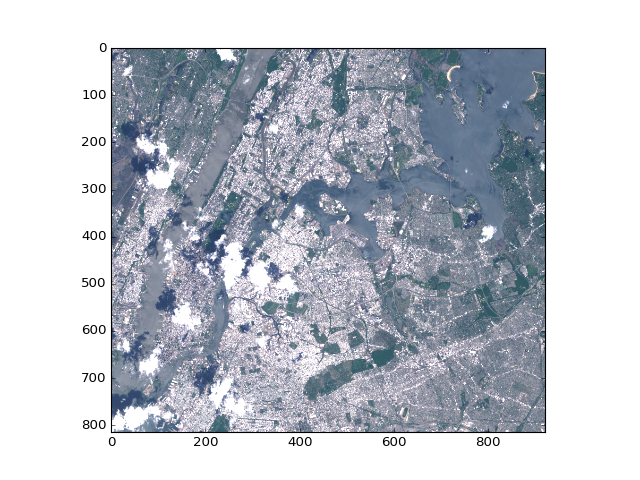

Enter Contrast, 0 to exit: 5
Enter Contrast, 0 to exit: 0


In [2]:
#find the clearest image
%matplotlib notebook
rgb_array = lf.rgb_display(rgbn[...,:3])

How do we unpack data?
============================================
![axis](figs/axis.png)

In [3]:
#rgb_array has three axis: [row, col, channel] axis=[0, 1, 2]
#unpack red, green, blue
red = rgb_array[...,0]
green = rgb_array[...,1]
blue = rgb_array[...,2]

<IPython.core.display.Javascript object>


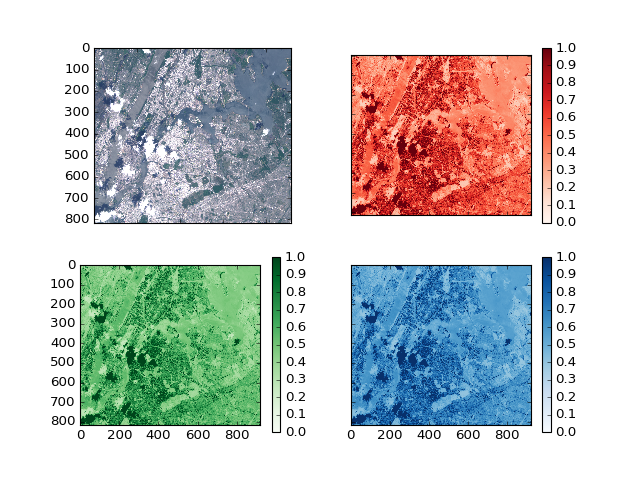

In [4]:
#plot each of the individual channels and compare to image
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
rgb = axes[0,0].imshow(rgb_array, origin="upper")
r = axes[0,1].imshow(red, cmap="Reds", vmin=0, vmax=1, origin="upper")
fig.colorbar(r, ax=axes[0,1])
g = axes[1,0].imshow(green, cmap="Greens", vmin=0, vmax=1, origin="upper")
fig.colorbar(g, ax=axes[1,0])
b = axes[1,1].imshow(blue, cmap="Blues", vmin=0, vmax=1, origin="upper")
fig.colorbar(b, ax=axes[1,1])
for ax in axes.flatten():
    ax.set_adjustable('box-forced')
#to do: explore the following images and see if you can find links
#between the raw data and each of the color bands

How do we look at the distribution of the data?
===============================================


<IPython.core.display.Javascript object>


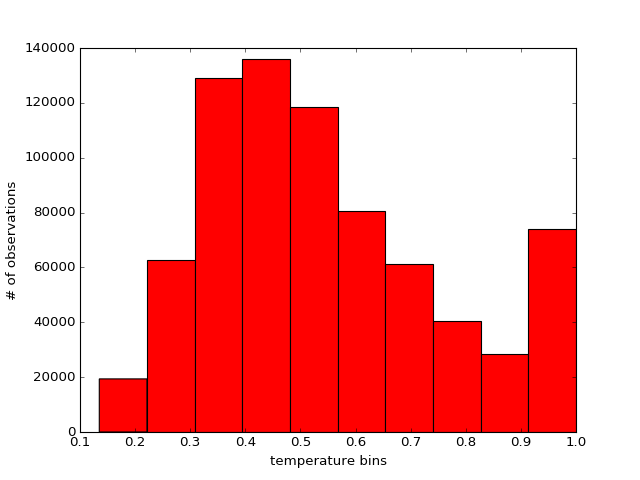

In [5]:
#plot histogram of red channel
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(red.flatten(), color="red")
ax.set_ylabel("# of observations")
ax.set_xlabel("temperature bins")
fig.canvas.draw()

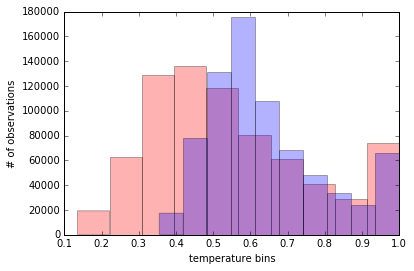

In [6]:
# add in blue channel
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(red.flatten(), color="red", alpha=0.3)
ax.hist(blue.flatten(), color='blue', alpha=0.3)
ax.set_ylabel("# of observations")
ax.set_xlabel("temperature bins")
fig.canvas.draw()

ToDo:
====
1. plot histograms for green and blue channels
2. plot histograms for raw (uncontrasted) data


Histogram => pdf
=========================

![img](figs/distro.jpg)
src: [NausicaaDistribution](https://www.etsy.com/listing/71739287/collection-of-10-distribution-plushies)

pdfs (probability distribution functions) are a representation of the chance (probability) of an observation occurring

In [7]:
import scipy.stats as st
import numpy as np

#estimate the P function of the distribution
kernal = st.gaussian_kde(red.flatten())
# color values range between 0 & 1 

x = np.linspace(0,1,100) #the range of potential color values
y = kernal(x) #probability of each x happening

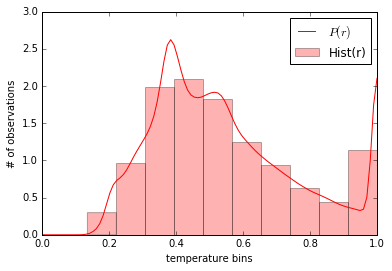

In [8]:
#plot histogram and pdf of red channel
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(red.flatten(), color="red",normed=True, alpha=0.3, label="Hist(r)")
ax.plot(x, y, color="red", label="$P(r)$")
ax.set_ylabel("# of observations")
ax.set_xlabel("temperature bins")
ax.legend()
fig.canvas.draw()

ToDo
=====
1. plot pdfs for green and blue channels
2. plot pfds for raw (uncontrasted) data